Rainfall dificit data preview:
                ST_NM  Rainfall_Dificit
0     Andhra Pradesh        -15.668376
1          Telangana        -19.971024
2            Gujarat        -26.204423
3          Karnataka        -14.765567
4     Madhya Pradesh        -17.653635
5        Maharashtra        -13.457275
6             Odisha        -13.364149
7             Punjab        -21.385442
8          Rajasthan        -21.897483
9         Tamil Nadu        -15.713738
10       West Bengal        -11.362076
11     Uttar Pradesh        -18.662110
12      Chhattisgarh        -14.759477
13  Himachal Pradesh        -20.826234
14         Jharkhand        -16.210961
15       Uttarakhand        -17.481576
16            Kerala        -18.738370
17           Tripura        -24.763428


C:\Users\IEG\AppData\Local\Temp\ipykernel_10556\1912773472.py:54: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):


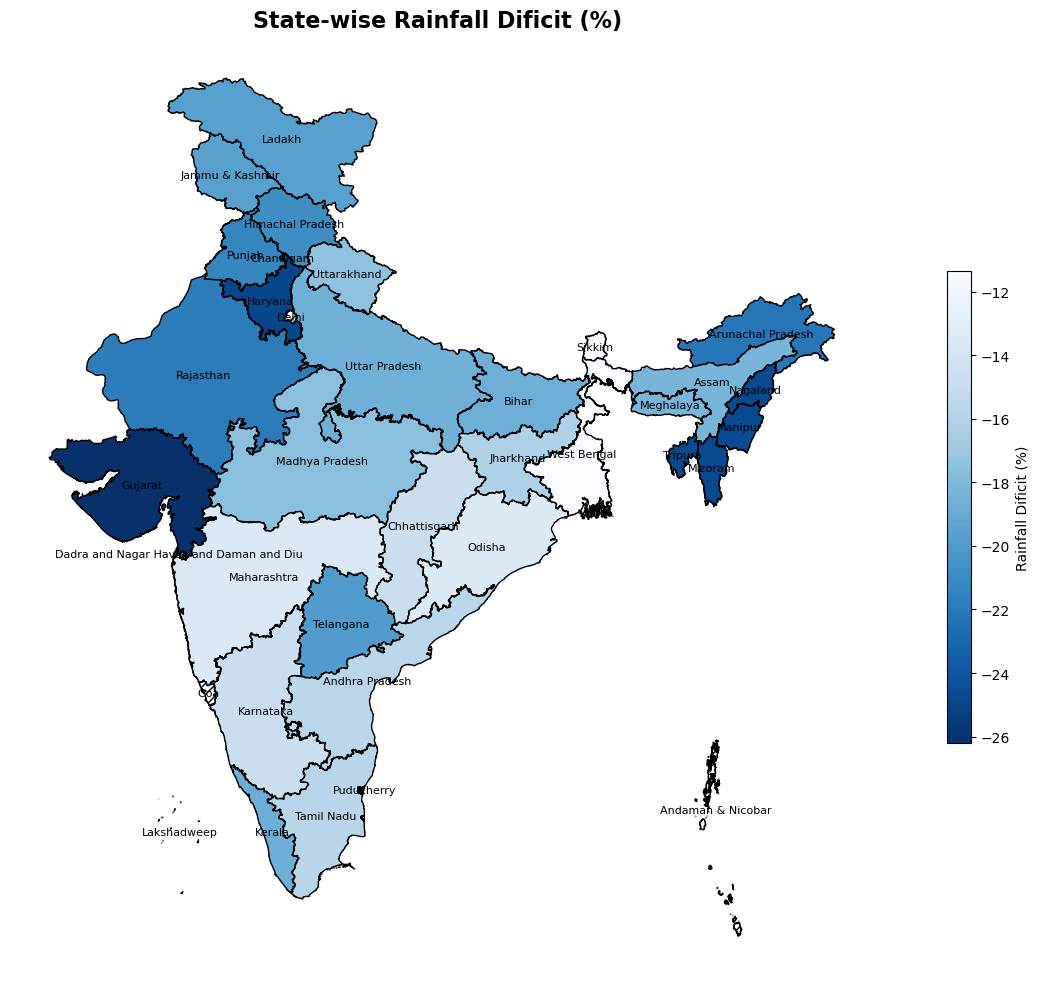

In [12]:
#!pip install fiona shapely pyproj rtree
#!pip install geopandas matplotlib pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Path to the shapefile
shapefile_path = r"C:\Users\IEG\Desktop\state_map\Admin2.shp"

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Load the reservoir volume data from the CSV file
csv_path = "Rainfall_Dificit.csv"
rainfall_dificit = pd.read_csv(csv_path)

# Print the first few rows to inspect the data
print("Rainfall dificit data preview:\n", rainfall_dificit.head(18))

# Assuming 'State' column in CSV matches 'ST_NM' in shapefile, and 'Rainfall' 
STATE_COLUMN = 'ST_NM'  # State names in the shapefile
CSV_STATE_COLUMN = 'ST_NM'  # State column in CSV (adjust if necessary)
METRE_COLUMN = 'Rainfall_Dificit'    # Volume column in CSV (adjust if necessary)

# Merge the shapefile data with the reservoir data based on state names
gdf_merged = gdf.merge(rainfall_dificit, how='left', left_on=STATE_COLUMN, right_on=CSV_STATE_COLUMN)

# Plot the map with reservoir volumes, ensuring that missing data shows as blank or NaN
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a choropleth map for reservoir volumes
gdf_merged.plot(
    ax=ax,
    column=METRE_COLUMN,  # Use reservoir volume for color
    cmap='Blues_r',          # Standard and appealing color map for volumes
    legend=True,
    edgecolor='black',
    missing_kwds={         # Define how missing data will be displayed
        "color": "white",   # States with no data will be pure white
        "hatch": "///",     # Dot-dot pattern for unavailable data
        "label": "No Data"  # Label for the missing data in the legend
    },
    legend_kwds={
        'label': "Rainfall Dificit (%)",
        'orientation': "vertical",
        'shrink': 0.5
    }
)

# Add a title to the map
ax.set_title("State-wise Rainfall Dificit (%) ", fontsize=16, fontweight='bold')

# Annotate each state with its name inside the map, no bold for state names
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Remove the axis for a cleaner map
ax.set_axis_off()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the map
plt.show()


Rainfall deficit data preview:
                ST_NM  Rainfall_Dificit  Unnamed: 2
0     Andhra Pradesh        -15.739125         NaN
1          Telangana        -19.971024         NaN
2            Gujarat        -27.625950         NaN
3          Karnataka        -14.219810         NaN
4     Madhya Pradesh        -17.653635         NaN
5        Maharashtra        -13.894515         NaN
6             Odisha        -13.374144         NaN
7             Punjab        -21.385442         NaN
8          Rajasthan        -22.115389         NaN
9         Tamil Nadu        -18.377746         NaN
10       West Bengal        -12.406095         NaN
11     Uttar Pradesh        -18.662110         NaN
12      Chhattisgarh        -14.759477         NaN
13  Himachal Pradesh        -20.826234         NaN
14         Jharkhand        -16.210961         NaN
15       Uttarakhand        -17.707842         NaN
16            Kerala        -18.738370         NaN
17           Tripura        -22.832633         NaN

C:\Users\IEG\AppData\Local\Temp\ipykernel_2144\1140452870.py:54: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):


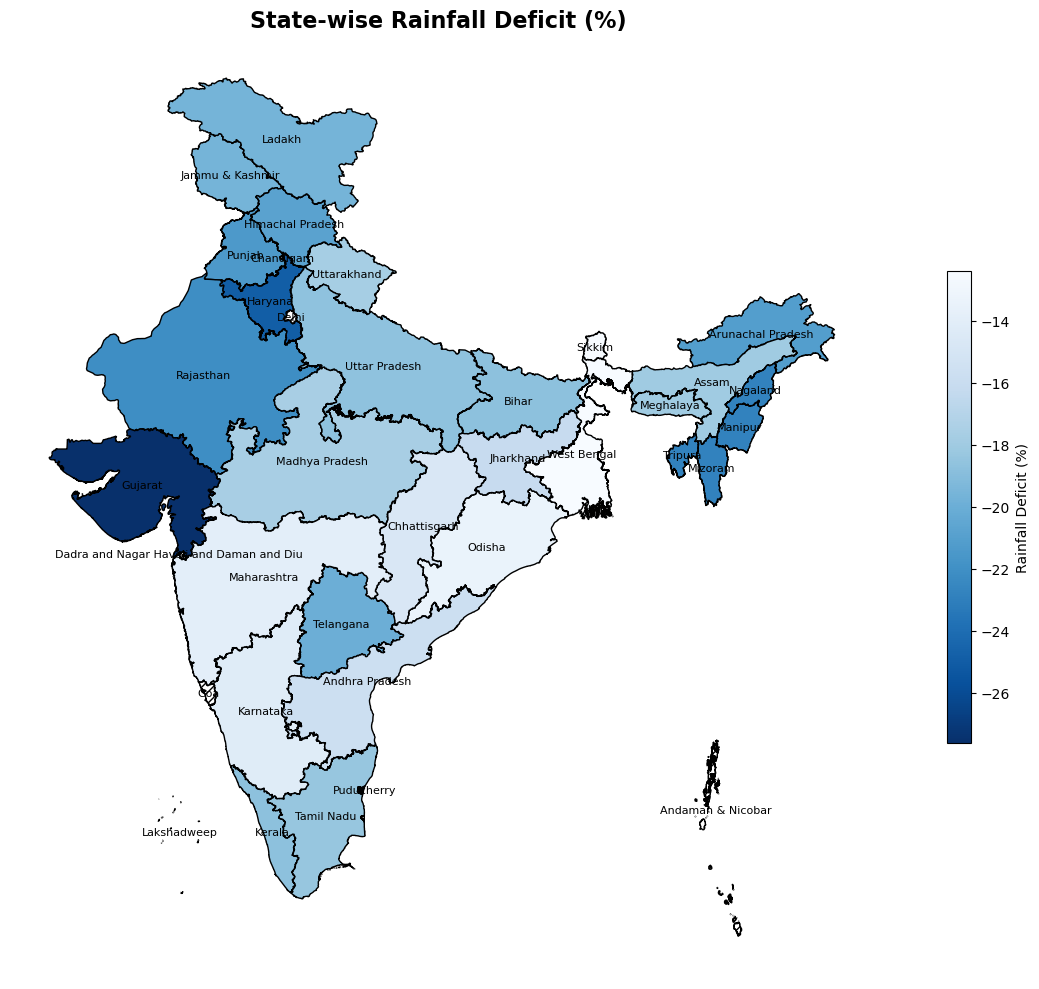

In [3]:
#!pip install fiona shapely pyproj rtree
#!pip install geopandas matplotlib pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Path to the shapefile
shapefile_path = r"C:\Users\IEG\Desktop\state_map\Admin2.shp"

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Load the reservoir volume data from the CSV file
csv_path = "Rainfall_Dificit.csv"
rainfall_dificit = pd.read_csv(csv_path)

# Print the first few rows to inspect the data
print("Rainfall deficit data preview:\n", rainfall_dificit.head(18))

# Assuming 'State' column in CSV matches 'ST_NM' in shapefile, and 'Rainfall' 
STATE_COLUMN = 'ST_NM'  # State names in the shapefile
CSV_STATE_COLUMN = 'ST_NM'  # State column in CSV (adjust if necessary)
METRE_COLUMN = 'Rainfall_Dificit'    # Volume column in CSV (adjust if necessary)

# Merge the shapefile data with the reservoir data based on state names
gdf_merged = gdf.merge(rainfall_dificit, how='left', left_on=STATE_COLUMN, right_on=CSV_STATE_COLUMN)

# Plot the map with reservoir volumes, ensuring that missing data shows as blank or NaN
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a choropleth map for reservoir volumes
gdf_merged.plot(
    ax=ax,
    column=METRE_COLUMN,  # Use reservoir volume for color
    cmap='Blues_r',        # Reversed blue color map, lightest for highest values
    legend=True,
    edgecolor='black',
    missing_kwds={         # Define how missing data will be displayed
        "color": "white",   # States with no data will be pure white
        "hatch": "///",     # Dot-dot pattern for unavailable data
        "label": "No Data"  # Label for the missing data in the legend
    },
    legend_kwds={
        'label': "Rainfall Deficit (%)",
        'orientation': "vertical",
        'shrink': 0.5
    }
)

# Add a title to the map
ax.set_title("State-wise Rainfall Deficit (%) ", fontsize=16, fontweight='bold')

# Annotate each state with its name inside the map, no bold for state names
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Remove the axis for a cleaner map
ax.set_axis_off()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the map
plt.show()
